In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Lectura de Datos

In [2]:
train_uni = pd.read_excel("../data/train_universidad.xlsx", sheetname="train_universidad.csv")
submit_uni = pd.read_excel("../data/test_universidad.xlsx", sheetname="test_universidad")

# Exploración de Datos

In [3]:
print("Las variables del dataset son: {0}".format(', '.join(list(train_uni.columns))))

Las variables del dataset son: COD_ENCUESTADO, Nombre Campus, NIVEL ACTUAL, Clave de carrera, Ciclo, COMENTARIO, IND_GEA, IND_DELEGADO, CANT_CURSOS_MATRICU_SIN_INGLES, UOD_depostista_ind_deportista, NPS


In [4]:
print("Dimensiones del dataset de Entrenamiento: {0}".format(train_uni.shape))
print("Dimensiones del dataset de Submit: {0}".format(submit_uni.shape))

Dimensiones del dataset de Entrenamiento: (20000, 11)
Dimensiones del dataset de Submit: (8427, 10)


** Target **

In [5]:
train_uni.groupby("NPS").agg('size')

NPS
1    1061
2    3107
3    8136
4    7696
dtype: int64

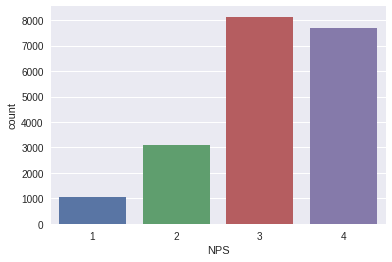

In [6]:
sns.countplot(x="NPS", data=train_uni)

In [7]:
train_uni['NPS'] = train_uni['NPS'].map({1:0, 2:1, 3:2, 4:3})

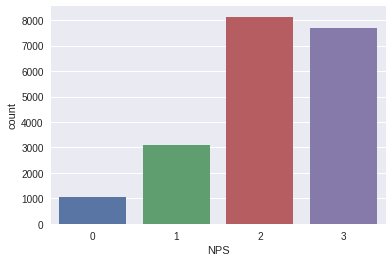

In [8]:
sns.countplot(x="NPS", data=train_uni)

** Missings o Nulos? **

In [9]:
train_uni.isnull().sum()

COD_ENCUESTADO                        0
Nombre Campus                         0
NIVEL ACTUAL                          0
Clave de carrera                      0
Ciclo                                 0
COMENTARIO                            0
IND_GEA                           19701
IND_DELEGADO                      16468
CANT_CURSOS_MATRICU_SIN_INGLES      366
UOD_depostista_ind_deportista     19852
NPS                                   0
dtype: int64

In [10]:
# Imputación de la variable IND_DELEGADO
train_uni.loc[train_uni['IND_DELEGADO'] == 'Delegado','IND_DELEGADO'] = 1
train_uni["IND_DELEGADO"].fillna(0, inplace=True)

# Imputación de la variable IND_GEA
train_uni.loc[train_uni['IND_GEA'] == 'GEA','IND_GEA'] = 1
train_uni["IND_GEA"].fillna(0, inplace=True)

# Imputación de la variable UOD_depostista_ind_deportista
train_uni.loc[train_uni['UOD_depostista_ind_deportista'] == 'Deportista','UOD_depostista_ind_deportista'] = 1
train_uni["UOD_depostista_ind_deportista"].fillna(0, inplace=True)

# Imputación de la variable CANT_CURSOS_MATRICU_SIN_INGLES
train_uni["CANT_CURSOS_MATRICU_SIN_INGLES"].fillna(12, inplace=True)
train_uni["CANT_CURSOS_MATRICU_SIN_INGLES"] = train_uni["CANT_CURSOS_MATRICU_SIN_INGLES"].astype(int)

In [11]:
# Imputación de la variable IND_DELEGADO
submit_uni.loc[submit_uni['IND_DELEGADO'] == 'Delegado','IND_DELEGADO'] = 1
submit_uni["IND_DELEGADO"].fillna(0, inplace=True)

# Imputación de la variable IND_GEA
submit_uni.loc[submit_uni['IND_GEA'] == 'GEA','IND_GEA'] = 1
submit_uni["IND_GEA"].fillna(0, inplace=True)

# Imputación de la variable UOD_depostista_ind_deportista
submit_uni.loc[submit_uni['UOD_depostista_ind_deportista'] == 'Deportista','UOD_depostista_ind_deportista'] = 1
submit_uni["UOD_depostista_ind_deportista"].fillna(0, inplace=True)

# Imputación de la variable CANT_CURSOS_MATRICU_SIN_INGLES
submit_uni["CANT_CURSOS_MATRICU_SIN_INGLES"].fillna(12, inplace=True)
submit_uni["CANT_CURSOS_MATRICU_SIN_INGLES"] = submit_uni["CANT_CURSOS_MATRICU_SIN_INGLES"].astype(int)

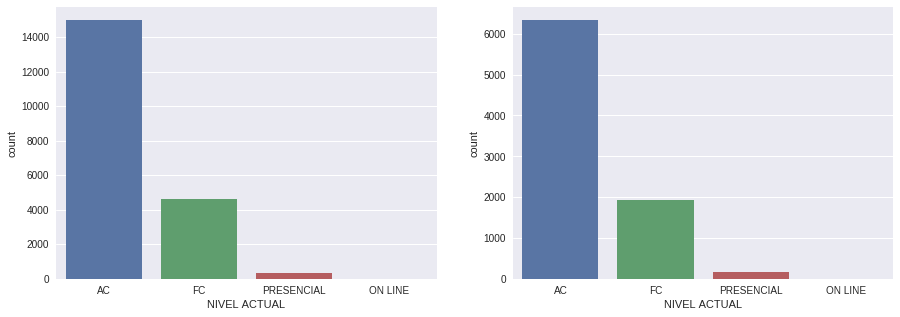

In [12]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x="NIVEL ACTUAL", data=train_uni, ax=ax1)
sns.countplot(x="NIVEL ACTUAL", data=submit_uni, ax=ax2)

In [13]:
# Encoding de las Variables Categóricas
niv_dic = {'AC':1, 'FC':'2', 'PRESENCIAL':3,'ON LINE':4}

train_uni.loc[:,"NIVEL ACTUAL"] = train_uni["NIVEL ACTUAL"].map(niv_dic)
submit_uni.loc[:,"NIVEL ACTUAL"] = submit_uni["NIVEL ACTUAL"].map(niv_dic)

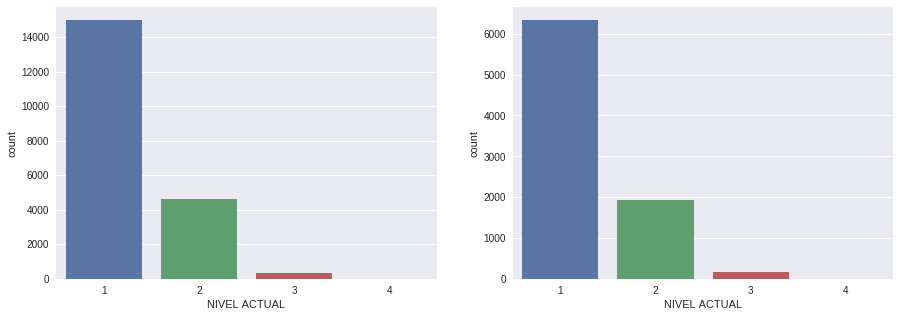

In [14]:
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.countplot(x="NIVEL ACTUAL", data=train_uni, ax=ax1)
sns.countplot(x="NIVEL ACTUAL", data=submit_uni, ax=ax2)

# Variables a partir del comentario (Text Mining)

In [15]:
comment_values_train = pd.read_csv("../intermedios/04_comment_values_train.csv")
comment_values_test = pd.read_csv("../intermedios/04_comment_values_test.csv")

In [16]:
values_vars = ['COD_ENCUESTADO','MEDIA_GMEAN','MEDIA_MEDIA','MODA_MEDIA','HMEAN_GMEAN','MODA_MIN','MAX_MIN','MEDIA_MIN','MODA_PESO_GMEAN','MIN_MAX','MODA_VARIATION','MEDIANA_MIN','MIN_KURTOSIS','HMEAN_MIN','GMEAN_MIN']
comment_values_train = comment_values_train[values_vars]
comment_values_test = comment_values_test[values_vars]

In [17]:
print("Dimensiones del dataset de Entrenamiento: {0}".format(comment_values_train.shape))
print("Dimensiones del dataset de Submit: {0}".format(comment_values_test.shape))

Dimensiones del dataset de Entrenamiento: (20000, 15)
Dimensiones del dataset de Submit: (8427, 15)


** Agrego las variables obtenidas a partir de comentario **

In [18]:
train_uni = train_uni.merge(comment_values_train, how="left", on="COD_ENCUESTADO")
submit_uni = submit_uni.merge(comment_values_test, how="left", on="COD_ENCUESTADO")

In [19]:
train_uni.head()

,COD_ENCUESTADO,Nombre Campus,NIVEL ACTUAL,Clave de carrera,Ciclo,COMENTARIO,IND_GEA,IND_DELEGADO,CANT_CURSOS_MATRICU_SIN_INGLES,UOD_depostista_ind_deportista,...,MODA_MIN,MAX_MIN,MEDIA_MIN,MODA_PESO_GMEAN,MIN_MAX,MODA_VARIATION,MEDIANA_MIN,MIN_KURTOSIS,HMEAN_MIN,GMEAN_MIN
0,13501,1,1,3,2,Me gusta la u es paja bro y soy pito,0,1,6,0,...,3,3,3.000000,2.252567,3,0.141421,3.0,-1.500000,3.000000,3.000000
1,23622,3,1,25,1,El metodo de blended no le hace bien a todos,0,1,5,0,...,3,4,2.468217,1.528322,1,0.117688,3.0,-3.000000,2.119335,2.309303
2,8354,4,1,31,1,"Los profesores, sus métodos de enseñanza bes ...",0,0,5,0,...,3,4,2.727891,2.184358,4,0.118451,3.0,10.071429,2.347132,2.555151
3,17745,4,1,28,6,Porque posee gran mayoría de profesores espec...,1,0,6,0,...,3,4,2.909091,2.085288,1,0.128565,3.0,-3.000000,2.613861,2.778487
4,10867,3,1,34,1,La pencion,0,0,6,0,...,3,4,2.362733,1.416149,1,0.000000,3.0,-3.000000,2.010406,2.201128


In [20]:
col_use_train = [c for c in train_uni.columns.tolist() if c not in ["COMENTARIO"]]
col_use_submit = [c for c in submit_uni.columns.tolist() if c not in ["COMENTARIO"]]

In [21]:
train_uni[col_use_train].to_csv("../intermedios/06_dataset_train.csv", index=False)
submit_uni[col_use_submit].to_csv("../intermedios/06_dataset_submit.csv", index=False)

Fin de Fase Preparacion de Data